In [ ]:
"""
Copyright (c) 2024 -- 
Licensed
Written by Rohith Krishnamurthy

"""

The `1962_2006_walmart_store_openings.csv` file is available here:
https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv

It contains information on Walmart store openings between the years 1962-2006. Some explanations on the meaning of variable names:

- `storenum`: the unique store number (storenumber is an id, not a count)	
- `OPENDATE`: the date the original store was opened
- `date_super`: the date the store became a super store
- `conversion`: whether the original store was converted to a super store
- `STRCITY`: the name of the city where the store is located
- `STRSTATE`: the state where the store is located

When answering the questions below, please make sure to examine the dataset carefully and understand if it needs further data aggregation, cleaning, or wrangling before you calcualte the answers to your questions.

Import the dataset and ensure all columns of data are properly read into an appropriate data structure.

In [1]:
import pandas as pd

# Attempt to load the dataset
try:
    data_url = 'https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv'
    walmart_data = pd.read_csv(data_url)
except Exception as e:
    print(f"Error loading the dataset: {e}")
    # Exit the script if the dataset can't be loaded
    import sys
    sys.exit()
    
# Display the first few rows of the dataframe to ensure it's loaded correctly
walmart_data.head(10)


,storenum,OPENDATE,date_super,conversion,st,county,STREETADDR,STRCITY,STRSTATE,ZIPCODE,type_store,LAT,LON,MONTH,DAY,YEAR
0,1,7/1/62,3/1/97,1.0,5,7,2110 WEST WALNUT,Rogers,AR,72756,Supercenter,36.342235,-94.07141,7,1,1962
1,2,8/1/64,3/1/96,1.0,5,9,1417 HWY 62/65 N,Harrison,AR,72601,Supercenter,36.236984,-93.09345,8,1,1964
2,4,8/1/65,3/1/02,1.0,5,7,2901 HWY 412 EAST,Siloam Springs,AR,72761,Supercenter,36.179905,-94.50208,8,1,1965
3,8,10/1/67,3/1/93,1.0,5,29,1621 NORTH BUSINESS 9,Morrilton,AR,72110,Supercenter,35.156491,-92.75858,10,1,1967
4,7,10/1/67,NaN,NaN,5,119,3801 CAMP ROBINSON RD.,North Little Rock,AR,72118,Wal-Mart,34.813269,-92.30229,10,1,1967
5,10,7/1/68,3/1/98,1.0,40,21,2020 SOUTH MUSKOGEE,Tahlequah,OK,74464,Supercenter,35.923658,-94.97185,7,1,1968
6,13,11/1/68,3/1/96,1.0,29,97,2705 GRAND AVE,Carthage,MO,64836,Supercenter,37.168985,-94.31164,11,1,1968
7,12,7/1/68,3/1/94,1.0,40,131,1500 LYNN RIGGS BLVD,Claremore,OK,74017,Supercenter,36.327143,-95.61192,7,1,1968
8,11,3/1/68,2/20/02,1.0,5,5,65 WAL-MART DRIVE,Mountain Home,AR,72653,Supercenter,36.329026,-92.35781,3,1,1968
9,9,3/1/68,3/1/00,1.0,29,143,1303 SOUTH MAIN,Sikeston,MO,63801,Supercenter,36.891163,-89.58355,3,1,1968


- which state has the `7th highest` total number of Walmart super stores?
- which city has the `5th highest` total number of Walmart stores (super stores and regular stores combined)?

In [2]:
# Finding the 7th highest total number of Walmart super stores by state
super_stores_by_state = walmart_data[walmart_data['conversion'] == 1].groupby('STRSTATE').size()
state_7th_highest_super_stores = super_stores_by_state.sort_values(ascending=False).index[6]

# Finding the 5th highest total number of Walmart stores (both super and regular stores combined) by city
stores_by_city = walmart_data.groupby('STRCITY').size()
city_5th_highest_stores = stores_by_city.sort_values(ascending=False).index[4]

# Print the results
print(f"The state with the 7th highest number of Walmart super stores is: {state_7th_highest_super_stores}")
print(f"The city with the 5th highest total number of Walmart stores is: {city_5th_highest_stores}")

The state with the 7th highest number of Walmart super stores is: NC
The city with the 5th highest total number of Walmart stores is: San Antonio


Write a function that takes as arguments:

1. the data frame you generated above from importing the Walmart dataset
2. a state abbreviaton (e.g. `AR`)

and, then, the function returns a pandas Data Frame with 2 columns: 
1. a column called `date` that contains the date (note that date must be properly ordered)
2. a column called `cumsum` that contains the `cumulative` (i.e. `running`) sum of the number of stores over time opened in that state


In [3]:
def cumulative_stores_by_state(dataframe, state_abbr):
    """
    Returns a DataFrame with the cumulative sum of stores opened over time in a specific state.
    """
    try:
        state_data = dataframe[dataframe['STRSTATE'] == state_abbr].copy()
        state_data['date'] = state_data.apply(lambda x: x['date_super'] if x['conversion'] == 1 else x['OPENDATE'], axis=1)
        state_data['date'] = pd.to_datetime(state_data['date'])
        state_data_sorted = state_data.sort_values(by='date')
        state_data_sorted['cumsum'] = state_data_sorted['date'].expanding().count()
        result_df = state_data_sorted[['date', 'cumsum']].drop_duplicates().reset_index(drop=True)
        return result_df
    except Exception as e:
        print(f"Error processing data for state {state_abbr}: {e}")
        return pd.DataFrame(columns=['date', 'cumsum'])

# Call the function for a specific state (e.g., 'AR' for Arkansas) and print the result
result_df = cumulative_stores_by_state(walmart_data, 'AR')  # Change 'AR' to the state abbreviation of interest
print(result_df.head())

        date  cumsum
0 1974-05-01     1.0
1 1976-03-01     2.0
2 1976-05-01     3.0
3 1977-09-01     4.0
4 1977-11-01     5.0


Using any of the three plotting libraries we discussed (`matplotlib`, `seaborn`, or `bokeh`), plot the time series of cumulative store count over time in the state of Idaho (ID).

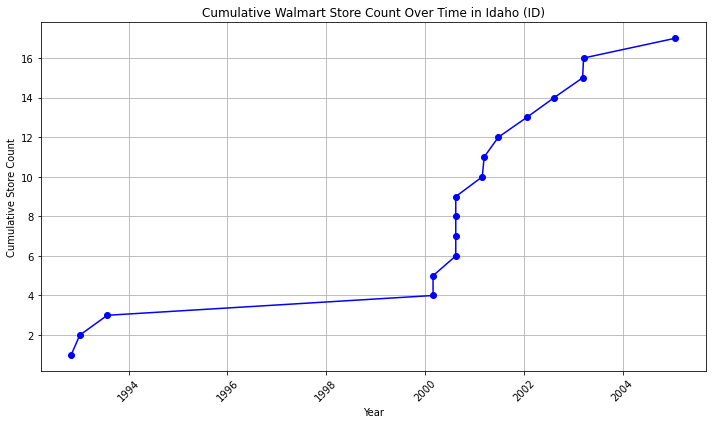

In [4]:
import matplotlib.pyplot as plt
# Call the function for the state of Idaho ('ID') and store the result
idaho_stores_cumulative = cumulative_stores_by_state(walmart_data, 'ID')

# Plotting the time series of cumulative store count over time in Idaho (ID)
plt.figure(figsize=(10, 6))
plt.plot(idaho_stores_cumulative['date'], idaho_stores_cumulative['cumsum'], marker='o', linestyle='-', color='blue')
plt.title('Cumulative Walmart Store Count Over Time in Idaho (ID)')
plt.xlabel('Year')
plt.ylabel('Cumulative Store Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Using any of the three plotting libraries we discussed (`matplotlib`, `seaborn`, or `bokeh`), plot a bar chart that shows the `total` number of Walmart stores in each of the states that directly border the state of Utah (Arkansas (AR)).

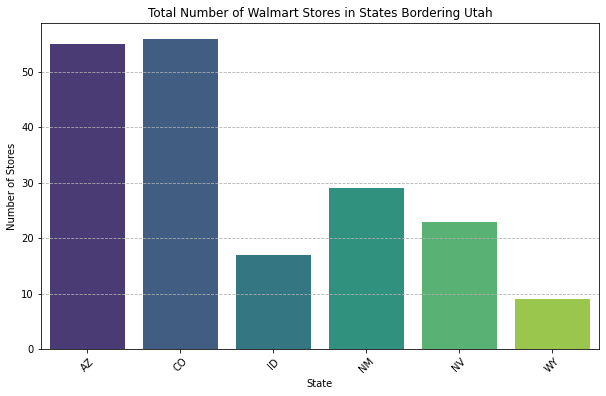

In [5]:
import seaborn as sns

try:
    # List of states that border Utah (excluding Arkansas as it's not bordering Utah)
    border_states = ['CO', 'AZ', 'ID', 'NV', 'NM', 'WY']
    # Filter the dataset for stores in these border states
    border_states_data = walmart_data[walmart_data['STRSTATE'].isin(border_states)]
    # Count the number of stores in each state
    store_counts = border_states_data.groupby('STRSTATE').size().reset_index(name='Number of Stores')
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='STRSTATE', y='Number of Stores', data=store_counts, palette='viridis')
    plt.title('Total Number of Walmart Stores in States Bordering Utah')
    plt.xlabel('State')
    plt.ylabel('Number of Stores')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--')
    plt.show()
except Exception as e:
    print(f"Error plotting data: {e}")